# Thư viện sử dụng

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [3]:
# Đọc dữ liệu
df = pd.read_csv('seattle-weather.csv')

In [4]:
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


+ Dữ liệu thời tiết thành phố Seattle - Mỹ
- date : năm tháng ngày
- precipitation : Lượng mưa (mm)
- temp-max : Nhiệt độ cao nhất (°C)
- temp_min : Nhiệt độ thấp nhất (°C)
- wind : Gió (m/s)
- weather : Thời tiết

- Dữ liệu thời tiết trong vòng 4 năm (2012-2015)

In [5]:
df.shape

(1461, 6)

Text(0.5, 1.0, 'Count of Weather Categories')

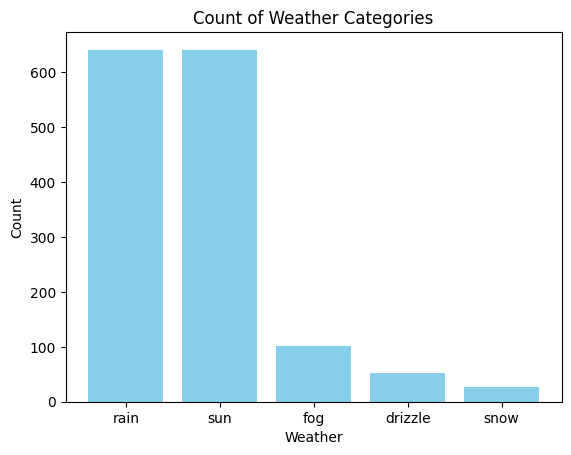

In [11]:
weather_counts = df['weather'].value_counts()
plt.bar(weather_counts.index, weather_counts.values, color='skyblue')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Categories')

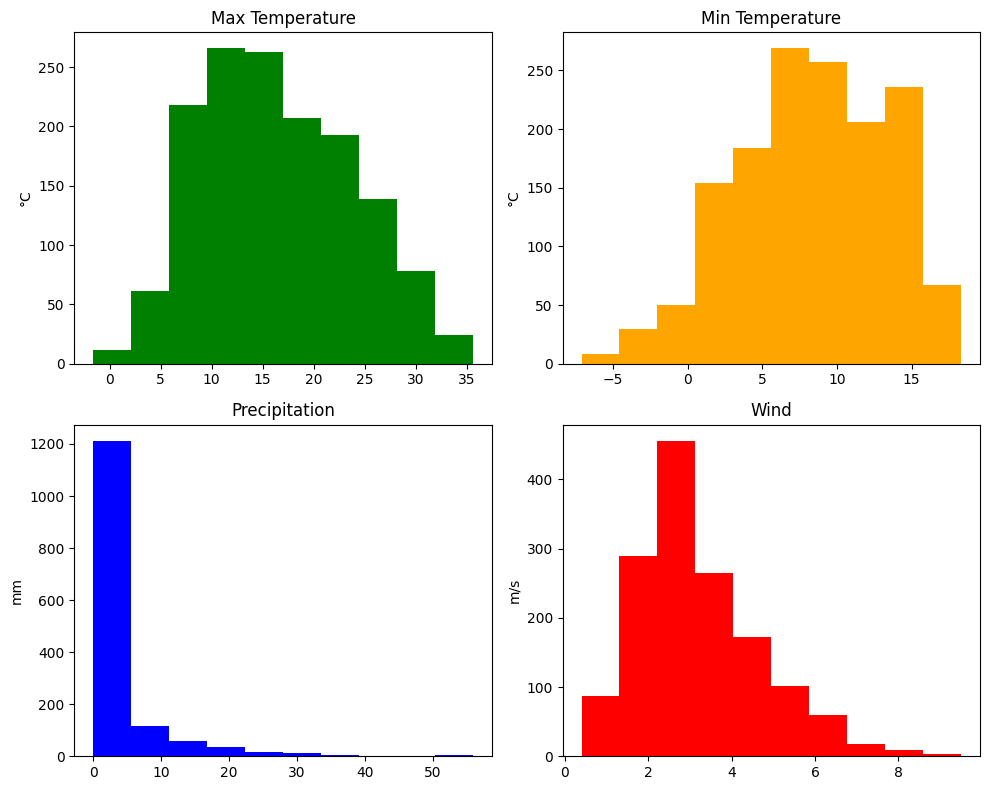

In [19]:
# Tạo một figure và các axes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Vẽ histogram cho từng cột lên từng axes
df["temp_max"].plot(kind="hist", ax=axs[0, 0], title="Max Temperature", color='green')
axs[0, 0].set_ylabel("°C")

df["temp_min"].plot(kind="hist", ax=axs[0, 1], title="Min Temperature", color='orange')
axs[0, 1].set_ylabel("°C")

df["precipitation"].plot(kind="hist", ax=axs[1, 0], title="Precipitation", color='blue')
axs[1, 0].set_ylabel("mm")

df["wind"].plot(kind="hist", ax=axs[1, 1], title="Wind", color='red')
axs[1, 1].set_ylabel("m/s")

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [12]:
df.iloc[:,1:4]

,precipitation,temp_max,temp_min
0,0.0,12.8,5.0
1,10.9,10.6,2.8
2,0.8,11.7,7.2
3,20.3,12.2,5.6
4,1.3,8.9,2.8
...,...,...,...
1456,8.6,4.4,1.7
1457,1.5,5.0,1.7
1458,0.0,7.2,0.6
1459,0.0,5.6,-1.0


<Axes: >

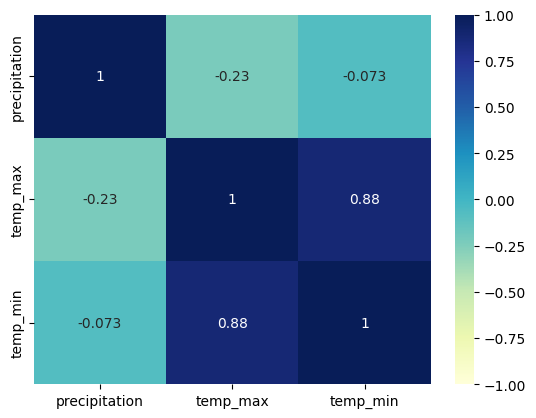

In [15]:

corr_matrix = df.iloc[:,1:4].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

In [20]:
df.isnull().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [21]:
data = df.drop(["date"], axis = 1)

In [22]:
y = data['weather']
features =['temp_max', 'temp_min', 'precipitation', 'wind']
x = data[features]

In [24]:
lc = LabelEncoder()
data["weather"] = lc.fit_transform(data["weather"])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [26]:
knn = KNeighborsClassifier()
knnmodel = knn.fit(x_train, y_train)
knnscore = knn.score(x_test, y_test)*100
print("Accuracy of KNN model is: %.2f"%knnscore)

Accuracy of KNN model is: 77.47


In [38]:
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     drizzle       0.17      0.10      0.12        10
         fog       0.10      0.08      0.09        12
        rain       0.86      0.86      0.86       133
        snow       0.80      0.50      0.62         8
         sun       0.76      0.82      0.79       130

    accuracy                           0.77       293
   macro avg       0.54      0.47      0.50       293
weighted avg       0.76      0.77      0.77       293



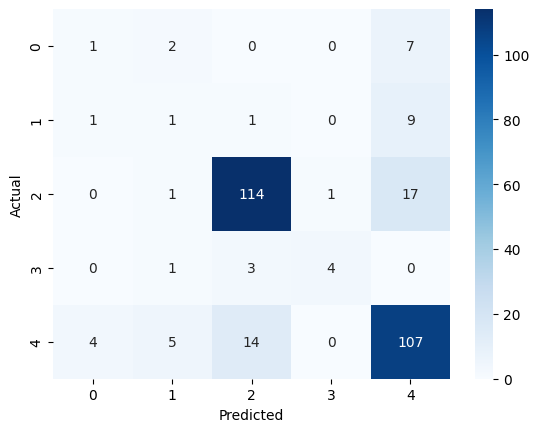

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [43]:

misclassified_indexes = np.where(y_test != y_pred)[0]
print(f'Misclassified indexes: {misclassified_indexes}')


Misclassified indexes: [  1   2   6  13  14  21  24  27  39  40  48  53  54  62  66  73  74  82
  83  87  89  93  94  98  99 103 104 107 119 120 125 131 139 142 144 146
 155 160 165 174 175 190 191 193 195 199 205 210 211 217 225 234 244 250
 251 253 256 258 259 263 268 272 274 280 290 292]


In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, x_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores):.2f}')


Cross-validation scores: [0.74786325 0.73076923 0.74358974 0.7167382  0.75536481]
Mean cross-validation score: 0.74


In [28]:
svm = SVC()
svcmodel = svm.fit(x_train, y_train)
svcscore = svm.score(x_test, y_test)*100
print("Accuracy of SVM model is: %.2f"%svcscore)

Accuracy of SVM model is: 81.91


In [46]:
from sklearn.metrics import classification_report

y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        10
         fog       0.00      0.00      0.00        12
        rain       0.92      0.83      0.87       133
        snow       0.00      0.00      0.00         8
         sun       0.75      0.99      0.85       130

    accuracy                           0.82       293
   macro avg       0.33      0.37      0.35       293
weighted avg       0.75      0.82      0.78       293



C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

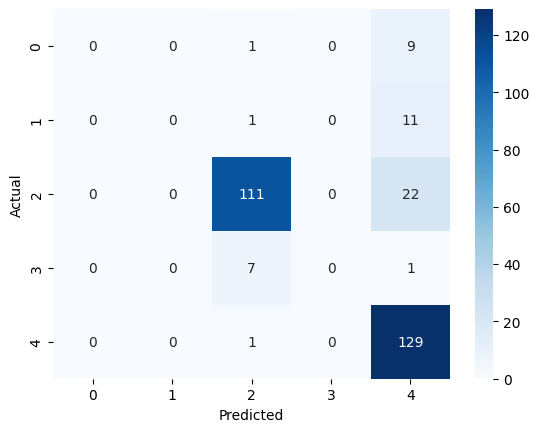

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [48]:
import numpy as np
misclassified_indexes = np.where(y_test != y_pred)[0]
print(f'Misclassified indexes: {misclassified_indexes}')


Misclassified indexes: [  1  13  21  22  24  39  40  43  48  53  54  55  62  82  83  84  89  94
  97 103 119 120 125 131 142 144 145 146 147 155 160 169 174 187 191 195
 196 199 205 210 211 213 224 244 250 253 258 259 263 274 275 290 292]


In [49]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(svm, x_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores):.2f}')


Cross-validation scores: [0.76495726 0.76068376 0.77350427 0.75107296 0.77253219]
Mean cross-validation score: 0.76
